In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('python/data/train.csv')

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,pymnt_plan,...,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,issue_d_le,earliest_cr_line_le
0,15000.0,0,11.99,498.15,1,7,4,70000.0,1,0,...,1,0,0,0,0,0,0,1,2013.750000,1991.916667
1,3725.0,0,6.03,113.38,0,0,0,52260.0,1,0,...,1,0,0,0,0,0,1,0,2012.750000,2000.750000
2,16000.0,0,11.14,524.89,1,6,3,67500.0,1,0,...,0,0,0,0,1,0,1,0,2013.250000,2001.500000
3,4200.0,0,13.33,142.19,2,12,1,21600.0,0,0,...,1,0,0,0,0,1,0,0,2015.166667,2003.333333
4,6500.0,0,12.69,218.05,1,9,10,41000.0,1,0,...,0,0,0,0,1,1,0,0,2012.000000,1990.666667


In [4]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,record_id
count,200189.000000,200189.000000,200189.000000,2.001890e+05,200189.000000,200189.000000,200189.000000,200189.000000,89621.000000,200189.000000,...,200189.000000,200035.000000,200189.000000,200145.000000,200189.0,200189.000000,152232.000000,1.522320e+05,1.522320e+05,2.001890e+05
mean,13660.968260,13.877760,420.482277,7.237452e+04,0.777570,16.707776,0.257706,0.851031,35.004553,10.979245,...,15144.396675,54.527829,25.046816,0.007375,1.0,0.003392,159.822179,1.370173e+05,2.944761e+04,4.533243e+08
std,8170.415321,4.426724,245.688125,5.737515e+04,0.415879,7.853802,0.756067,1.067603,21.835429,4.913762,...,18126.129936,24.761396,11.756803,0.093911,0.0,0.064028,1692.986504,1.503913e+05,2.869555e+04,7.706932e+04
min,500.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000e+00,0.000000e+00,4.531908e+08
25%,7500.000000,10.990000,242.550000,4.500000e+04,1.000000,10.870000,0.000000,0.000000,16.000000,8.000000,...,5866.000000,36.500000,16.000000,0.000000,1.0,0.000000,0.000000,2.827775e+04,1.320000e+04,4.532575e+08
50%,12000.000000,13.660000,367.130000,6.200000e+04,1.000000,16.370000,0.000000,1.000000,32.000000,10.000000,...,10938.000000,56.000000,23.000000,0.000000,1.0,0.000000,0.000000,7.945300e+04,2.210000e+04,4.533245e+08
75%,18700.000000,16.780000,549.740000,8.700000e+04,1.000000,22.190000,0.000000,1.000000,51.000000,14.000000,...,19059.000000,74.000000,32.000000,0.000000,1.0,0.000000,0.000000,2.062952e+05,3.655450e+04,4.533911e+08
max,35000.000000,28.990000,1424.570000,8.706582e+06,1.000000,57.140000,22.000000,8.000000,151.000000,76.000000,...,975800.000000,892.300000,118.000000,6.000000,1.0,5.000000,296368.000000,8.000078e+06,1.035000e+06,4.534577e+08


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200189 entries, 0 to 200188
Data columns (total 43 columns):
loan_amnt                     200189 non-null float64
term                          200189 non-null int64
int_rate                      200189 non-null float64
installment                   200189 non-null float64
grade                         200189 non-null int32
sub_grade                     200189 non-null int32
emp_length                    200189 non-null int32
annual_inc                    200189 non-null float64
loan_status                   200189 non-null int64
pymnt_plan                    200189 non-null int32
purpose                       200189 non-null int32
zip_code                      200189 non-null int32
addr_state                    200189 non-null int32
dti                           200189 non-null float64
delinq_2yrs                   200189 non-null float64
inq_last_6mths                200189 non-null float64
mths_since_last_delinq        200189 non-nu

In [6]:
df.emp_length.fillna(value=0,inplace=True)
df.revol_util.fillna(value=0,inplace=True)
df.collections_12_mths_ex_med.fillna(value=df.collections_12_mths_ex_med.mean(),inplace=True)
df.mths_since_last_delinq.fillna(value=df.mths_since_last_delinq.mean(),inplace=True)
df.tot_coll_amt.fillna(value=df.tot_coll_amt.mean(),inplace=True)
df.tot_cur_bal.fillna(value=df.tot_coll_amt.mean(),inplace=True)
df.total_rev_hi_lim.fillna(value=df.total_rev_hi_lim.mean(),inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)
df['term'] = pd.factorize(df['term'])[0]

In [7]:
df['is_title_known'] = df['emp_title'].map(lambda x: 0 if x == 'n/a' else 1)
df.drop('emp_title', axis=1, inplace=True)

In [8]:
df['zip_code'] = df['zip_code'].where(df['zip_code'].str.len() == 4, 
                                               df['zip_code'].str[:3])
df['zip_code'] = df['zip_code'].astype(int)

In [9]:
label_encoder = LabelEncoder()
categorical_columns = df[['grade','sub_grade','pymnt_plan','purpose','initial_list_status','application_type','addr_state']]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [10]:
one_hot_encoded_home_ownership = pd.get_dummies(df.home_ownership)
df = df.drop('home_ownership',axis = 1)

df = df.join(one_hot_encoded_home_ownership)

In [11]:
one_hot_encoded_verification_status = pd.get_dummies(df.verification_status)
df = df.drop('verification_status',axis = 1)

df = df.join(one_hot_encoded_verification_status)

In [12]:
def month_to_decimal(month):
    month_dict = {'Jan':0, 'Feb':1/12., 'Mar':2/12., 'Apr':3/12., 'May':4/12., 'Jun':5/12., 
     'Jul':6/12., 'Aug':7/12., 'Sep':8/12., 'Oct':9/12., 'Nov':10/12., 'Dec':11/12.}
    return month_dict[month]

def convert_date(month_year):
    month_and_year = month_year.split('-')
    return float(month_and_year[1]) + month_to_decimal(month_and_year[0])

def encode_with_func(df, column_name, func_name):
    df[column_name+'_le'] = df[column_name].map(func_name)
    df.drop(column_name, axis=1, inplace=True)

encode_with_func(df, 'issue_d', convert_date)

In [13]:
encode_with_func(df, 'earliest_cr_line', convert_date)

In [14]:
Y = df['loan_status'].values

X = df.drop(['loan_status'], axis=1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l1')
classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(penalty = 'l2')
classifier1.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred = classifier.predict(x_test)

In [19]:
y_pred1 = classifier1.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm1 = confusion_matrix(y_test,y_pred1)

In [21]:
cm

array([[ 1448, 11823],
       [ 1246, 45540]], dtype=int64)

In [22]:
cm1

array([[ 1448, 11823],
       [ 1249, 45537]], dtype=int64)

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7823900627736983
Precision: 0.7938915328696198
Recall: 0.9733681015688453


In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

Accuracy: 0.7823401102286162
Precision: 0.7938807531380753
Recall: 0.973303979823024


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.11      0.18     13271
           1       0.79      0.97      0.87     46786

   micro avg       0.78      0.78      0.78     60057
   macro avg       0.67      0.54      0.53     60057
weighted avg       0.74      0.78      0.72     60057



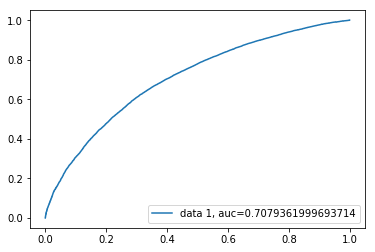

In [25]:
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()